In [14]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df = pd.read_csv('../data/heart_disease_preprocessed.csv')

In [16]:
pca = PCA()
X_pca = pca.fit_transform(df)

In [17]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

In [18]:
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")

Number of components to retain 95% variance: 12


In [19]:
pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(df)

In [20]:
X_pca_df = pd.DataFrame(X_pca_reduced, columns=[f'PC{i+1}' for i in range(n_components)])
X_pca_df.to_csv('../data/heart_disease_pca.csv', index=False)

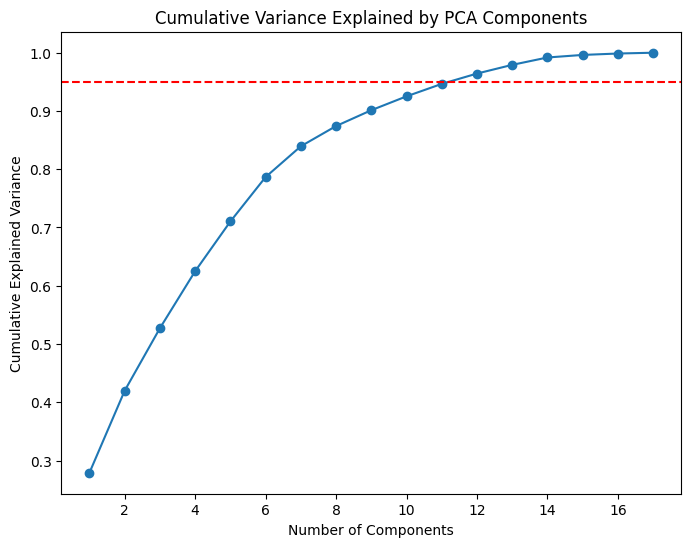

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained by PCA Components')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

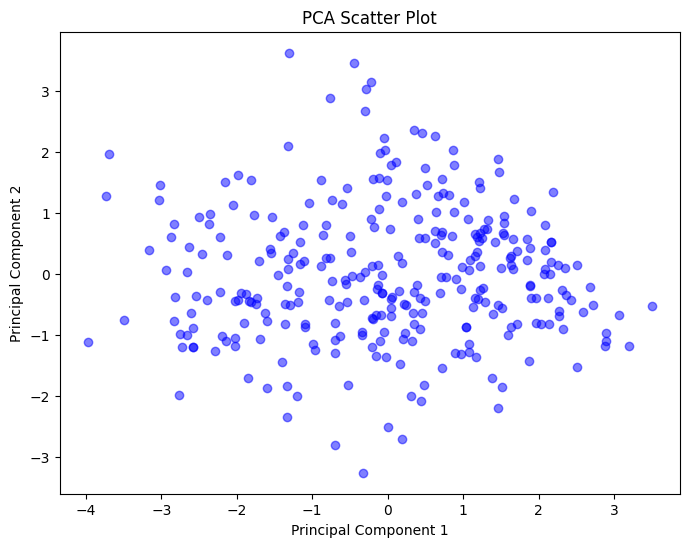

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()